In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from helpers_images import read_metadata, read_results, get_indexes

In [3]:
# reload automaticaly external modules
%load_ext autoreload
%autoreload 2

### **Results paths**

In [4]:
paths_all = []
with open("./paths.txt") as f:
    paths_all = f.read().splitlines()
for i,p in enumerate(paths_all):
    print(f'{i: >2}: {p}')

 0: outputs/formatage/120/03_04_01_double_hline
 1: outputs/formatage/529/03_04_01_double_hline
 2: outputs/formatage/319/03_04_01_double_hline
 3: outputs/formatage/259/03_04_01_double_hline


In [38]:
paths = paths_all[-2:];paths

['outputs/formatage/319/03_04_01_double_hline',
 'outputs/formatage/259/03_04_01_double_hline']

In [39]:
degrees = []
rows    = []
cols    = []
heights = []
indexes = []
stresses = []
percents = []
connectivity = []

for path, dep in zip(paths, ['incremental', 'incremental']):
    degree_, rows_, cols_, *_  = read_metadata(path)
    connectivity_,_, heights_, active_cells, percents_per_steps, stresses_ =\
            read_results(path, dep, 'maxBending')
    
    
    degrees.append(degree_)
    rows.append(rows_)
    cols.append(cols_)
    heights.append(heights_)
    indexes.append(get_indexes(degree_, rows_, cols_))
    c = np.array(connectivity_)
    stresses.append([s[c[:,0], c[:,1]]for s in stresses_])

In [42]:
np.array(stresses).transpose((1,0,2))

array([[[7.09472542e-06, 2.79964086e-05, 7.46034834e-05, 7.45446648e-05,
         4.65760069e-05, 4.75451496e-05, 4.75772825e-05],
        [1.13309350e-04, 1.13456537e-04, 5.75273595e-05, 1.55105067e-05,
         5.75303750e-05, 1.13492502e-04, 1.13345270e-04]],

       [[9.06452214e-07, 1.43960103e-06, 1.53906656e-06, 3.65753995e-01,
         4.80443833e+00, 6.05852519e+00, 6.11838422e+00],
        [1.70386991e+00, 2.02612933e+00, 2.11390059e+00, 2.15669356e+00,
         2.17767142e+00, 2.18599794e+00, 2.18633225e+00]],

       [[5.87390857e-08, 8.80254792e-08, 8.90704309e-08, 6.85213388e-01,
         8.69478843e+00, 1.10516680e+01, 1.06930589e+01],
        [3.11180060e+00, 3.81769849e+00, 3.92974190e+00, 3.94961621e+00,
         3.93115954e+00, 3.89380353e+00, 3.84634272e+00]],

       [[2.75108946e-09, 3.73702784e-09, 3.88788255e-09, 9.82242169e-01,
         1.21299314e+01, 1.52204824e+01, 1.42405804e+01],
        [4.35321409e+00, 5.41700389e+00, 5.49835602e+00, 5.45575472e+00,
    

(2, 11, 7)

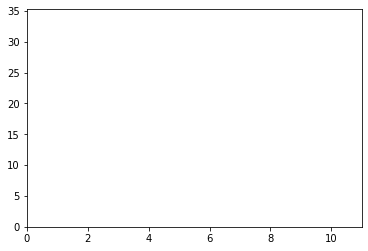

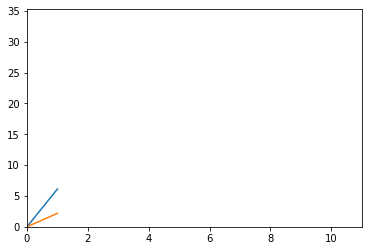

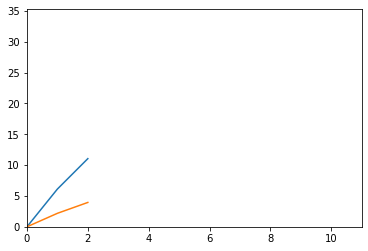

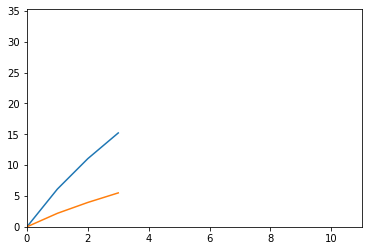

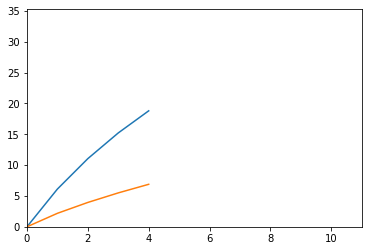

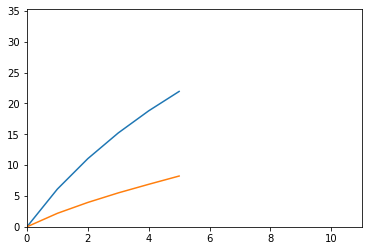

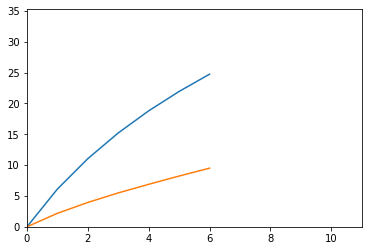

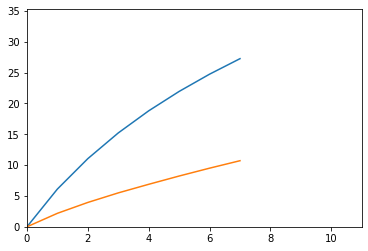

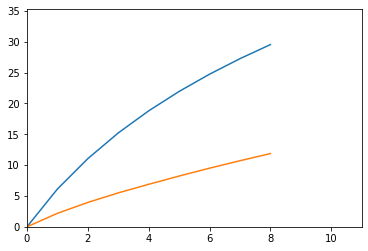

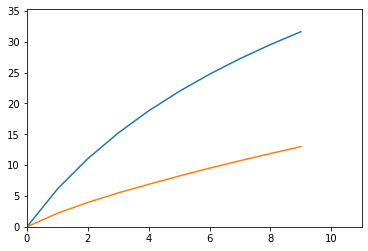

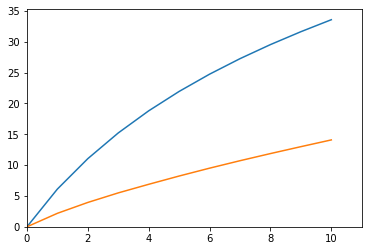

In [64]:
max_y = 1.05*np.array(stresses).max()
max_x = np.array(stresses).shape[1]
max_s = []
for s_ in np.array(stresses).transpose((1,0,2)):
    max_s.append(np.array(s_).max(axis=1))
    _, ax = plt.subplots()
    ax.set_ylim(0, max_y)
    ax.set_xlim(0, max_x)
    ax.plot(max_s)

In [ ]:
degrees = []
rows    = []
cols    = []
heights = []
indexes = []

for path, dep in zip(paths, ['linear']*len(paths)):
    degree_, rows_, cols_, *_  = read_metadata(path)
    _,_, heights_, *_ = read_results(path, dep, 'maxBending')
    
    degrees.append(degree_)
    rows.append(rows_)
    cols.append(cols_)
    heights.append(heights_)
    indexes.append(get_indexes(degree_, rows_, cols_))
    

max_y = 1.05*np.array(heights).max()
for i, heights_ in enumerate(np.array(heights).transpose((1,0,2))):
    _, ax = plt.subplots()
    ax.set_ylim(0, max_y)
    for idx, h in zip(indexes, heights_):
        # ax.plot(h[idx])
        ax.scatter(idx,h)
    
    # [RK] can we infer indexes from connectivity?
    

### **Metadata**

In [ ]:
degree, rows, cols, *_unused  = read_metadata(paths)

### **Load Results**

In [ ]:
connectivity,        \
init_center_pos,     \
heights,             \
active_cells,        \
percents_per_steps,  \
stresses_per_steps = \
    read_results(paths)

### **plot heights**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
indexes = get_indexes(degree, rows, cols)
max_y = 1.05*np.array(heights).max()
for h in heights:
    _, ax = plt.subplots()
    ax.set_ylim(-0.05, max_y)
    ax.scatter(indexes, h)

### **Images**

In [ ]:
plot2D_steps(connectivity,
             active_cells,
             percents_per_steps,
             init_center_pos,
             stresses_per_steps,
             stress_type='maxBending',
             dir_name=path,
             show_percent=False,
             show_plot=False)

In [ ]:
if cols==1 or rows==1:
    plot1D_steps(connectivity,
                 active_cells,
                 percents_per_steps,
                 init_center_pos,
                 stresses_per_steps,
                 stress_type='maxBending',
                 dir_name=path,
                 show_percent=False,
                 show_plot=False)

### **GIF**

In [ ]:
fps  = 3 # frames per seconds
loop = 2 # -1: no loop | 0: infinit loop | 1: loop once (see image twice) | 2: loop twice | ...
for name in ['structure_all', 'structure_perSteps', 'structure_own', 'scatter', 'sPlot']:
    img_name_i = f'"{path}/jpg/*{name}*.jpg"'
    gif_name_i = f'"{path}/jpg/gif/{name}.gif"'
    !ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
    img_name_i = f'{path}/png/*{name}*.png'
    gif_name_i = f'{path}/png/gif/{name}.gif'
    !gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i
    